<a href="https://colab.research.google.com/github/jmestanza/Guia_2_PASA/blob/master/Guia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import clear_output
! wget "https://raw.githubusercontent.com/jmestanza/Guia_2_PASA/master/data/originales/kickpush.wav"
clear_output()

from scipy.io.wavfile import read
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import wave, struct, math, random
from IPython.display import Audio

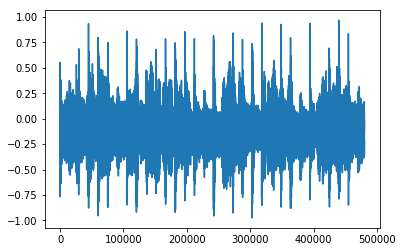

In [0]:
def get_mono_array(stereo_file_name):
    file = read(stereo_file_name)
    fs = file[0]
    datos = np.array(file[1],dtype=float) 
    datos = np.interp(datos, (datos.min(), datos.max()), (-1, +1)) #normalizamos
    ch0 = datos[:, 0]
    ch1 = datos[:, 1]
    datos = (ch0 + ch1)/2  # o lo hacemos mono
    return fs, datos

#Ejemplo para obtener un numpy array mono a partir de un archivo stereo
file_name = "kickpush.wav" 
fs, data = get_mono_array(file_name)
plt.plot(range(len(data)),data)


In [0]:
Audio(data,rate=fs)

In [0]:
# Ahora empieza el TP
# Obtenemos los datos de sweep lento
! wget "https://raw.githubusercontent.com/jmestanza/Guia_2_PASA/master/data/originales/sweep_lento.wav"
! wget "https://raw.githubusercontent.com/jmestanza/Guia_2_PASA/master/data/grabados/grab_sweep_lento.wav"
clear_output()


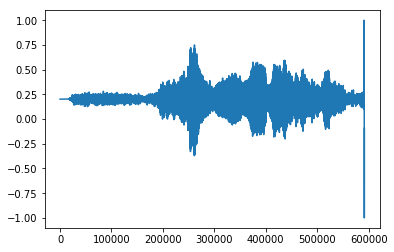

In [0]:
file_name = "grab_sweep_lento.wav"  
fs, data = get_mono_array(file_name)
plt.plot(range(len(data)),data)
Audio(data,rate=fs)

In [0]:
def getRxx(x, k):
    N = len(data)
    Rxx = []
    for j in range(k):
        sumatoria = 0
        for i in range(N-j):
            sumatoria = sumatoria + x[i+j]*x[i]
        Rxx.append((1/(N-j))*sumatoria)
    return Rxx
